# Iris Flower Classification Testing Notebook

### Overview
This notebook is designed to:
- Load the saved model and scaler.
- Run predictions on the test dataset.
- Evaluate the model's performance using various metrics.
- Verify that the model behaves as expected on unseen data.


#### **Importing the necessary libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

sns.set(style="whitegrid")
%matplotlib inline


#### **Loading the saved model and scaler**

In [2]:
model_filename = '..\\iris_model.pkl'
with open(model_filename, 'rb') as file:
    saved_objects = pickle.load(file)
    
model = saved_objects['model']
scaler = saved_objects['scaler']

print("Model and scaler loaded successfully!")


Model and scaler loaded successfully!


#### **Loading the Test Data**

In [3]:
# Load the original Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Separate features and target variable
X = data.drop("species", axis=1)
y = data["species"]

# Split the dataset using the same parameters as in training (test_size=0.3, random_state=42, stratify=y)
_, X_test, _, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Test data loaded and prepared.")


Test data loaded and prepared.


#### **Preprocessing the Test Data and Running Predictions**

Test Accuracy: 0.9333333333333333


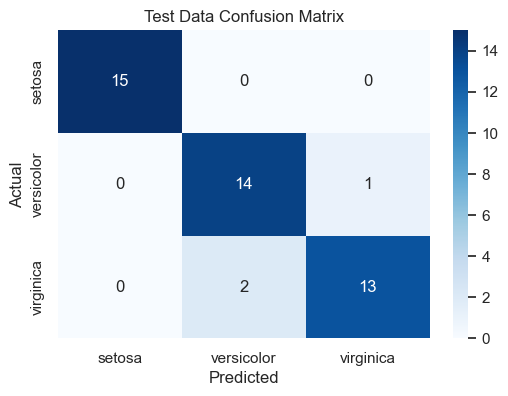


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [4]:
# Scale the test features using the loaded scaler
X_test_scaled = scaler.transform(X_test)

# Run predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Test Data Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


### Conclusion
In this testing notebook, we:
- Loaded the saved model and scaler.
- Prepared the test dataset consistently with the training phase.
- Ran predictions and evaluated model performance using accuracy, confusion matrix, and a classification report.

This confirms that our model generalizes well to unseen data.